In [1]:
import os 
import pickle
import pandas as pd
import numpy as np
import pprint


In [2]:
from enum import IntEnum
class HandleStatus(IntEnum):
    VALID = 1
    MISSING = 2
    DISABLED = 4
    

In [3]:
cd /z/fmrilab/home/dcolin/Measuring_Scripts


[Errno 2] No such file or directory: '/z/fmrilab/home/dcolin/Measuring_Scripts'
/Users/colin/Documents/AKH/NDIPolaris


In [4]:
import ndi_polaris_04_07 as ndi

In [5]:
d = pd.read_pickle('./Measurement_A')

data d = list of frames ,each frame (one list entry) is a dictionary. 

dict keys are system_status, handles, stray_markers, time_stamps. handle is a list with the number of trackers tracked.

each handle is a dict with: 'handle', 'status', 'quaternion', 'translation', 'error', 'port_status', 'frame_number', 'tool_information', 'marker_information', 'n_markers', 'marker_out_of_volume', 'markers'

The first Entry is the position of the Plate relative to the camera coordinates
first three values are the euler koordinates (alpha, beta, gamma) (top rotation, front, tilt)

In [6]:
position = d[0]
print(position)
d.remove(d[0])

{'system_status': [], 'handles': [{'handle': '01', 'status': <HandleStatus.VALID: 1>, 'quaternion': array([ 0.94013757,  0.01174189, -0.34050539, -0.00771884]), 'translation': array([  -44.24993896,   -46.94224548, -1512.94372559]), 'error': 0.17399075627326965, 'port_status': ['Occupied', 'Initialized', 'Enabled'], 'frame_number': 1121638378, 'tool_information': [[False, False, False, False, False, False, False, False], []], 'marker_information': ['Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Not used - Missing', 'Used', 'Not used - Missing', 'Used', 'Used'], 'n_markers': 3, 'marker_out_of_volume': [False, False, False, False, False, False, False, False], 'markers': [array([  -35.1472435 ,   -22.68466759,

In [7]:
len(d) # Number of recordet entries

11942

In [8]:
# Get unique and valid entries 
# That means no double frame numbers and all handles = defined trackers are valid
data = []
for i in range(len(d)):
    if i == 0:
        data.append(d[i])
    else:
        if d[i]['handles'][0]['frame_number'] != data[len(data)-1]['handles'][0]['frame_number']: #no double frame numbers
            if np.all([aa['status']==1 for aa in d[i]['handles']]): #if all stati are valid continue
                data.append(d[i])
            
print(len(data))            
            
    

3990


In [9]:
#initialize an array to fill with the distances between the markers
nd = np.empty([len(data), len(data[0]['handles']),len(data[0]['handles'])])
print(nd[0].shape)

(6, 6)


In [10]:
#fill 
for a in range(len(data)):
    for i in range (len(data[0]['handles'])):
        for j in range (len(data[0]['handles'])):
                x = data[a]['handles'][i]['translation']
                y = data[a]['handles'][j]['translation']
                nd[a][i,j] = np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2)

In [11]:
nd # nd is "number" of "distance" measurements 

array([[[  0.        , 268.29397658, 178.49489616, 323.67932378,
         152.73425039, 234.53123486],
        [268.29397658,   0.        , 291.81921722, 188.88780249,
         138.64165145, 216.62786636],
        [178.49489616, 291.81921722,   0.        , 228.49912508,
         255.3108743 , 114.53213879],
        [323.67932378, 188.88780249, 228.49912508,   0.        ,
         273.80093656, 113.97621726],
        [152.73425039, 138.64165145, 255.3108743 , 273.80093656,
           0.        , 237.81954952],
        [234.53123486, 216.62786636, 114.53213879, 113.97621726,
         237.81954952,   0.        ]],

       [[  0.        , 268.29148828, 178.48344771, 323.65925113,
         152.74268773, 234.52549548],
        [268.29148828,   0.        , 291.83258836, 188.88897569,
         138.64477037, 216.64756815],
        [178.48344771, 291.83258836,   0.        , 228.49879972,
         255.33178058, 114.53534695],
        [323.65925113, 188.88897569, 228.49879972,   0.        ,
      

In [12]:
for i in range (5):
    for j in range(5):
        if i != j:
            print(np.sqrt(np.var(nd[:,i,j])))

0.002520819815995076
0.007757617101142181
0.005265435211701556
0.0034652520816425988
0.002520819815995076
0.005081196431555777
0.007604999280920938
0.004102992494120006
0.007757617101142181
0.005081196431555777
0.002071272810456504
0.007063568636725412
0.005265435211701556
0.007604999280920938
0.002071272810456504
0.006981899717677087
0.0034652520816425988
0.004102992494120006
0.007063568636725412
0.006981899717677087


In [13]:
import matplotlib.pyplot as plt

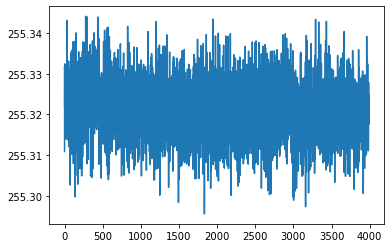

In [14]:
y = nd[:,2,4]
x = list(range(len(y)))
fig, ax = plt.subplots()
ax.plot(x,y)